In [2]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
conn = sqlite3.connect('/Users/aaronlevi/Documents/sql_db/pick-a-tune.db')
cur = conn.cursor()

In [4]:
allFeatures = pd.read_sql_query("SELECT * FROM features", conn)
labels = pd.read_sql_query("SELECT label FROM basic_info", conn)

allFeatures.drop('index', axis=1, inplace=True)

allFeatures.head()
# allFeatures = allFeatures.iloc[57:1329].reset_index(drop=True)
# labels = labels.iloc[57:1329].reset_index(drop=True)

,tempo,duration_m,time_signature,energy,n_unique_chords,n_difficult_chords,chord_per_min
0,89.132,2.408833,4.0,0.7260,8,2,47.740953
1,76.364,1.981967,4.0,0.0439,21,11,56.509528
2,172.286,3.533967,4.0,0.2920,4,0,17.826993
3,96.996,1.981967,4.0,0.7710,13,13,43.895794
4,129.012,4.212883,4.0,0.4900,3,0,13.292559


In [5]:
intLabel = pd.factorize(labels['Label'], )[0]
print(intLabel[0:4])

dummyLabel=pd.get_dummies(labels)
print(dummyLabel.head())

[0 0 1 0]
   Label_advanced  Label_intermediate  Label_novice
0               1                   0             0
1               1                   0             0
2               0                   0             1
3               1                   0             0
4               0                   0             1


In [6]:
# fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# ax[0].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['novice']==0], featuresWithLabels['n_difficult_chords'][featuresWithLabels['novice']==0])
# ax[0].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['novice']==1], featuresWithLabels['n_difficult_chords'][featuresWithLabels['novice']==1])
# ax[0].set_title('Novice')
# ax[0].set_xlabel('n unique chords')
# ax[0].set_ylabel('n difficult chords')

# ax[1].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['intermediate']==0], featuresWithLabels['n_difficult_chords'][featuresWithLabels['intermediate']==0])
# ax[1].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['intermediate']==1], featuresWithLabels['n_difficult_chords'][featuresWithLabels['intermediate']==1])
# ax[1].set_title('Intermediate')

# ax[2].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['advanced']==0], featuresWithLabels['n_difficult_chords'][featuresWithLabels['advanced']==0])
# ax[2].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['advanced']==1], featuresWithLabels['n_difficult_chords'][featuresWithLabels['advanced']==1])
# ax[2].set_title('Advanced')

# fig.savefig("nChords_scatters.png", bbox_inches='tight', dpi=600)

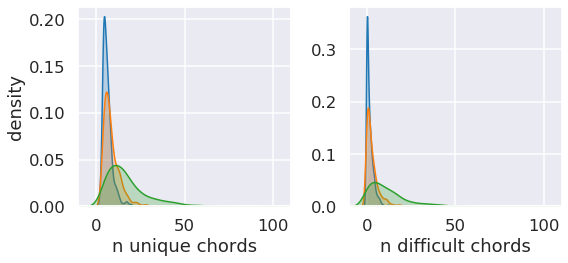

In [11]:
f = plt.figure(figsize=(12, 4))
gs = f.add_gridspec(1, 3)

sns.set_context("talk")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_novice']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False)
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_novice']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False)
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_novice']==1], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_intermediate']==1], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==1], legend=False)    

f.tight_layout()

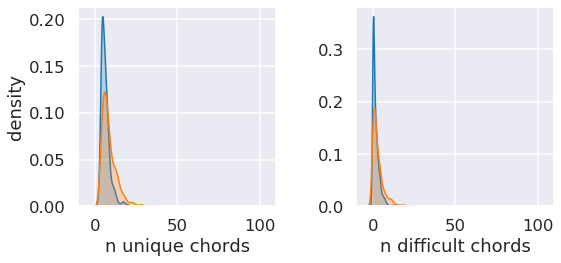

In [11]:
f = plt.figure(figsize=(12, 4))
gs = f.add_gridspec(1, 3)

sns.set_context("talk")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_novice']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=False)
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):    
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_novice']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=False)
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel(' ')    
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_novice']==1], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_intermediate']==1], legend=False)

f.tight_layout()

f.savefig("nov&int.png", bbox_inches='tight', dpi=600)

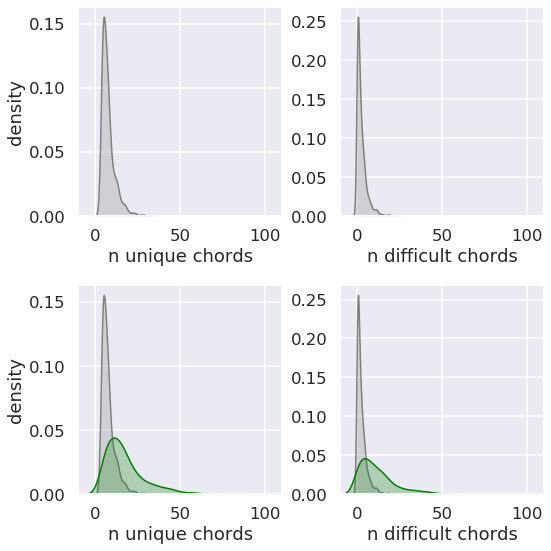

In [10]:
f = plt.figure(figsize=(8, 8))
# gs = f.add_gridspec(1, 3)
gs = f.add_gridspec(2, 2)

sns.set_context("talk")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    ax.set_ylim(0)

    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')    
    ax.set_xlim(-10,110)
    ax.set_ylim(0)


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False, color='green')
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False, color='green')
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')    
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==0], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==1], legend=False)

f.tight_layout()
f.savefig("adv&not.png", bbox_inches='tight', dpi=600)